In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def characterize_continuous_function(func, domain_A_interval, codomain_B_interval, num_samples=1000):
    """
    Characterizes a given continuous function f: A -> B as injective, surjective, or bijective.
    This is a numerical approximation based on sampling.

    Args:
        func (function): The continuous function to characterize.
        domain_A_interval (tuple): A tuple (start, end) representing the continuous domain A.
        codomain_B_interval (tuple): A tuple (start, end) representing the continuous codomain B.
        num_samples (int): Number of samples to take within the domain for approximation. Higher = more accurate, slower.

    Returns:
        tuple: A tuple containing booleans (is_injective, is_surjective, is_bijective),
               a string summary, the actual calculated range, and the x/y values for plotting.
    """
    if not (isinstance(domain_A_interval, tuple) and len(domain_A_interval) == 2 and
            isinstance(codomain_B_interval, tuple) and len(codomain_B_interval) == 2):
        raise TypeError("Domain and Codomain must be tuples (start, end) defining intervals.")

    x_vals = np.linspace(domain_A_interval[0], domain_A_interval[1], num_samples)
    y_vals = np.array([func(x) for x in x_vals])

    # --- Determine the actual range of the function over the given domain ---
    actual_range_min = np.min(y_vals)
    actual_range_max = np.max(y_vals)
    actual_range = (actual_range_min, actual_range_max)

    # --- Check for Injectivity (One-to-One) ---
    # For continuous functions, injectivity over an interval implies strict monotonicity.
    # We check if the function is consistently increasing or consistently decreasing.
    # Using a small tolerance (epsilon) for floating point comparisons.
    epsilon = 1e-6
    y_diffs = np.diff(y_vals)

    # Check if strictly increasing: all diffs >= -epsilon AND at least one diff > epsilon
    is_strictly_increasing = np.all(y_diffs >= -epsilon) and np.any(y_diffs > epsilon)
    # Check if strictly decreasing: all diffs <= epsilon AND at least one diff < -epsilon
    is_strictly_decreasing = np.all(y_diffs <= epsilon) and np.any(y_diffs < -epsilon)

    is_injective = is_strictly_increasing or is_strictly_decreasing

    # --- Check for Surjectivity (Onto) ---
    # A function f: A -> B is surjective if its range (image of A) is exactly B.
    is_surjective = (np.isclose(actual_range_min, codomain_B_interval[0], atol=epsilon) and
                     np.isclose(actual_range_max, codomain_B_interval[1], atol=epsilon))

    # Also, ensure that the actual range is contained within the codomain.
    # If a function's outputs go outside the specified codomain, it's fundamentally not a function TO that codomain.
    # For robust examples, we assume the function's output for domain A stays within B.
    # If not, it fails surjectivity by definition of range not matching codomain.
    if actual_range_min < codomain_B_interval[0] - epsilon or actual_range_max > codomain_B_interval[1] + epsilon:
        # If any part of the image falls outside the codomain B, it's not a function *onto B*.
        # So it cannot be surjective *onto B*.
        is_surjective = False


    # --- Check for Bijectivity ---
    is_bijective = is_injective and is_surjective

    # --- Prepare Summary ---
    summary = "Function Characteristics (Continuous):\n"
    summary += f"  Domain A: {domain_A_interval}\n"
    summary += f"  Codomain B: {codomain_B_interval}\n"
    summary += f"  Approximated Range of f (over Domain A): {actual_range}\n"

    if is_injective:
        summary += "  - Is Injective (One-to-One): Yes (Function appears strictly monotonic over the domain)\n"
    else:
        summary += "  - Is Injective (One-to-One): No (Function appears non-monotonic over the domain or has plateaus)\n"

    if is_surjective:
        summary += "  - Is Surjective (Onto): Yes (The function's range precisely covers the entire codomain B)\n"
    else:
        summary += "  - Is Surjective (Onto): No (The function's range does not precisely match the codomain B)\n"
        if not (np.isclose(actual_range_min, codomain_B_interval[0], atol=epsilon) and np.isclose(actual_range_max, codomain_B_interval[1], atol=epsilon)):
            summary += "    (Reason: Calculated range min/max does not match codomain min/max.)\n"
        elif actual_range_min < codomain_B_interval[0] - epsilon or actual_range_max > codomain_B_interval[1] + epsilon:
             summary += "    (Reason: Function outputs fall outside the specified codomain B.)\n"


    if is_bijective:
        summary += "  - Is Bijective: Yes (It is both injective and surjective)\n"
    else:
        summary += "  - Is Bijective: No\n"

    return is_injective, is_surjective, is_bijective, summary, actual_range, x_vals, y_vals

def plot_continuous_function(func, domain_A_interval, codomain_B_interval, actual_range, x_vals, y_vals, title="Continuous Function Mapping"):
    """
    Plots the continuous function, highlighting domain, codomain, and range.

    Args:
        func (function): The function being plotted.
        domain_A_interval (tuple): The domain A (start, end).
        codomain_B_interval (tuple): The codomain B (start, end).
        actual_range (tuple): The calculated actual range (min, max) of the function over domain A.
        x_vals (np.array): X values used for plotting the function curve.
        y_vals (np.array): Y values (f(x)) used for plotting the function curve.
        title (str): Title for the plot.
    """
    plt.figure(figsize=(10, 7))

    # 1. Plot the function curve
    plt.plot(x_vals, y_vals, color='blue', linewidth=2, label='f(x)')

    # 2. Highlight Domain A on X-axis
    plt.axvspan(domain_A_interval[0], domain_A_interval[1], color='lightblue', alpha=0.3, label='Domain A')
    # Draw thick line segment on x-axis for domain
    plt.hlines(0, domain_A_interval[0], domain_A_interval[1], color='blue', linestyle='-', linewidth=4, label='_nolegend_')


    # 3. Highlight Codomain B on Y-axis
    plt.axhspan(codomain_B_interval[0], codomain_B_interval[1], color='lightgreen', alpha=0.3, label='Codomain B')
    # Draw thick line segment on y-axis for codomain
    plt.vlines(0, codomain_B_interval[0], codomain_B_interval[1], color='green', linestyle='-', linewidth=4, label='_nolegend_')


    # 4. Highlight Actual Range on Y-axis
    # Draw a distinct, thick line directly on the y-axis (or near it) for the range
    # Find a good x-position to draw the range indicator line
    plot_xmin, plot_xmax = plt.xlim()
    range_indicator_x_pos = plot_xmin + (plot_xmax - plot_xmin) * 0.02 # A small offset from the left edge

    plt.plot([range_indicator_x_pos] * 2, actual_range, color='red', linewidth=8, solid_capstyle='round', zorder=10, label='Range of f (Image)')

    # Optional: Draw dashed lines from function curve to range highlights if desired
    # For min/max points on the curve
    min_y_idx = np.argmin(y_vals)
    max_y_idx = np.argmax(y_vals)
    plt.plot([x_vals[min_y_idx], range_indicator_x_pos], [y_vals[min_y_idx], actual_range[0]], ':', color='gray', linewidth=1, zorder=5)
    plt.plot([x_vals[max_y_idx], range_indicator_x_pos], [y_vals[max_y_idx], actual_range[1]], ':', color='gray', linewidth=1, zorder=5)


    # Set labels and title
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(title)
    plt.grid(True, linestyle=':', alpha=0.7)

    # Draw axes explicitly for clarity
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)

    # Adjust limits for better visibility, encompassing domain, codomain, and function values
    min_x_plot = min(domain_A_interval[0], x_vals.min())
    max_x_plot = max(domain_A_interval[1], x_vals.max())
    min_y_plot = min(codomain_B_interval[0], actual_range[0], y_vals.min())
    max_y_plot = max(codomain_B_interval[1], actual_range[1], y_vals.max())

    plt.xlim(min_x_plot - (max_x_plot-min_x_plot)*0.1, max_x_plot + (max_x_plot-min_x_plot)*0.1)
    plt.ylim(min_y_plot - (max_y_plot-min_y_plot)*0.1, max_y_plot + (max_y_plot-min_y_plot)*0.1)


    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
    plt.show()

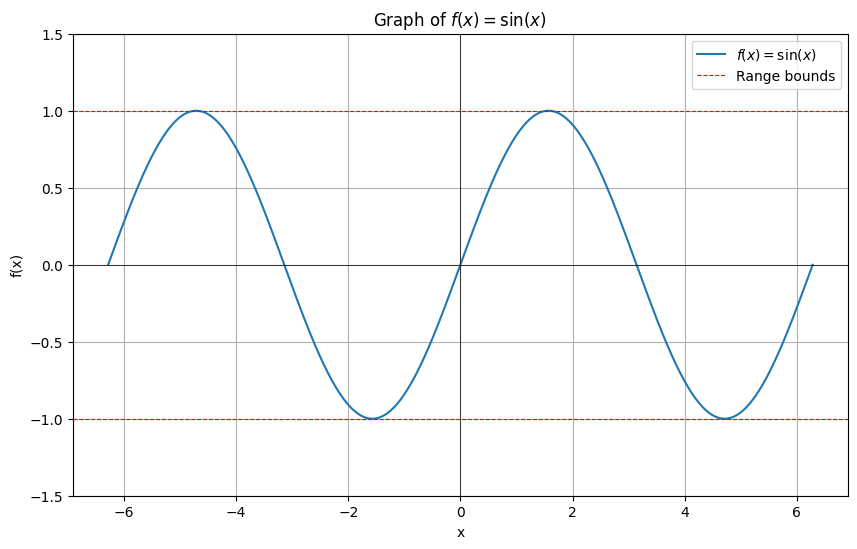

Function: f(x) = sin(x)
Domain: ℝ
Codomain: ℝ
Range (Image Set): [-1, 1]
Injective (One-to-One)? No
Surjective (Onto)? No


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(x)

# Analyze injective/surjective properties
injective = False
surjective = False
range_info = "[-1, 1]"
domain = "ℝ"
codomain = "ℝ"

# Plotting part
x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = \sin(x)$')
plt.title(r'Graph of $f(x) = \sin(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.ylim(-1.5, 1.5)
plt.axhline(1, color='red', linestyle='--', linewidth=0.8, label='Range bounds')
plt.axhline(-1, color='red', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()

# Print analysis
print("Function: f(x) = sin(x)")
print(f"Domain: {domain}")
print(f"Codomain: {codomain}")
print(f"Range (Image Set): {range_info}")
print(f"Injective (One-to-One)? {'Yes' if injective else 'No'}")
print(f"Surjective (Onto)? {'Yes' if surjective else 'No'}")

--- Example 1: Injective but Not Surjective (Continuous) ---
Function Characteristics (Continuous):
  Domain A: (0, 5)
  Codomain B: (0, 15)
  Approximated Range of f (over Domain A): (np.float64(0.0), np.float64(10.0))
  - Is Injective (One-to-One): Yes (Function appears strictly monotonic over the domain)
  - Is Surjective (Onto): No (The function's range does not precisely match the codomain B)
    (Reason: Calculated range min/max does not match codomain min/max.)
  - Is Bijective: No



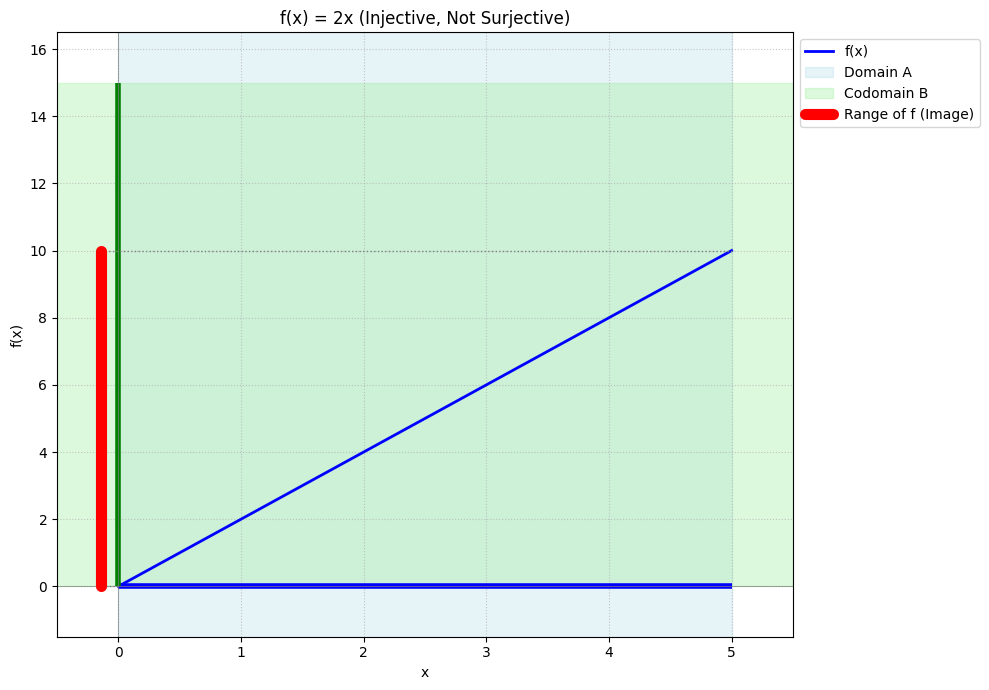

In [ ]:
# Example 1: Injective but Not Surjective (Continuous)

# Assuming characterize_continuous_function and plot_continuous_function are defined in a previous cell

def f1_continuous(x):
    return 2 * x # A simple linear function

domain_A1_cont = (0, 5) # Domain: [0, 5]
codomain_B1_cont = (0, 15) # Codomain: [0, 15]. Range will be [0, 10], so (10, 15] is not covered.

is_inj1_c, is_sur1_c, is_bij1_c, summary1_c, actual_range1_c, x_vals1_c, y_vals1_c = \
    characterize_continuous_function(f1_continuous, domain_A1_cont, codomain_B1_cont)

print("--- Example 1: Injective but Not Surjective (Continuous) ---")
print(summary1_c)
plot_continuous_function(f1_continuous, domain_A1_cont, codomain_B1_cont, actual_range1_c, x_vals1_c, y_vals1_c,
                         "f(x) = 2x (Injective, Not Surjective)")


--- Example 2: Surjective but Not Injective (Continuous) ---
Function Characteristics (Continuous):
  Domain A: (-2, 2)
  Codomain B: (0, 4)
  Approximated Range of f (over Domain A): (np.float64(4.008012016019843e-06), np.float64(4.0))
  - Is Injective (One-to-One): No (Function appears non-monotonic over the domain or has plateaus)
  - Is Surjective (Onto): No (The function's range does not precisely match the codomain B)
    (Reason: Calculated range min/max does not match codomain min/max.)
  - Is Bijective: No



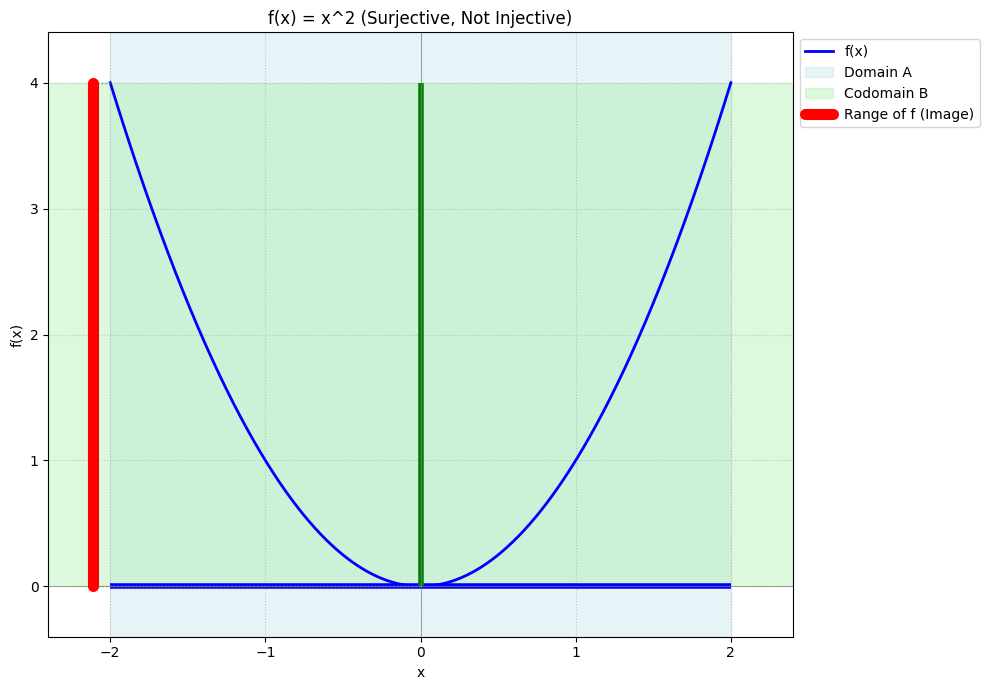

In [ ]:
# Example 2: Surjective but Not Injective (Continuous)

# Assuming characterize_continuous_function and plot_continuous_function are defined in a previous cell

def f2_continuous(x):
    return x**2

domain_A2_cont = (-2, 2) # Domain: [-2, 2]. Note: f(-1)=1, f(1)=1 -> Not injective
codomain_B2_cont = (0, 4) # Codomain: [0, 4]. Range is [0, 4], so it is surjective.

is_inj2_c, is_sur2_c, is_bij2_c, summary2_c, actual_range2_c, x_vals2_c, y_vals2_c = \
    characterize_continuous_function(f2_continuous, domain_A2_cont, codomain_B2_cont)

print("\n--- Example 2: Surjective but Not Injective (Continuous) ---")
print(summary2_c)
plot_continuous_function(f2_continuous, domain_A2_cont, codomain_B2_cont, actual_range2_c, x_vals2_c, y_vals2_c,
                         "f(x) = x^2 (Surjective, Not Injective)")


--- Example 3: Bijective (Continuous) ---
Function Characteristics (Continuous):
  Domain A: (1, 4)
  Codomain B: (1, 10)
  Approximated Range of f (over Domain A): (np.float64(1.0), np.float64(10.0))
  - Is Injective (One-to-One): Yes (Function appears strictly monotonic over the domain)
  - Is Surjective (Onto): Yes (The function's range precisely covers the entire codomain B)
  - Is Bijective: Yes (It is both injective and surjective)



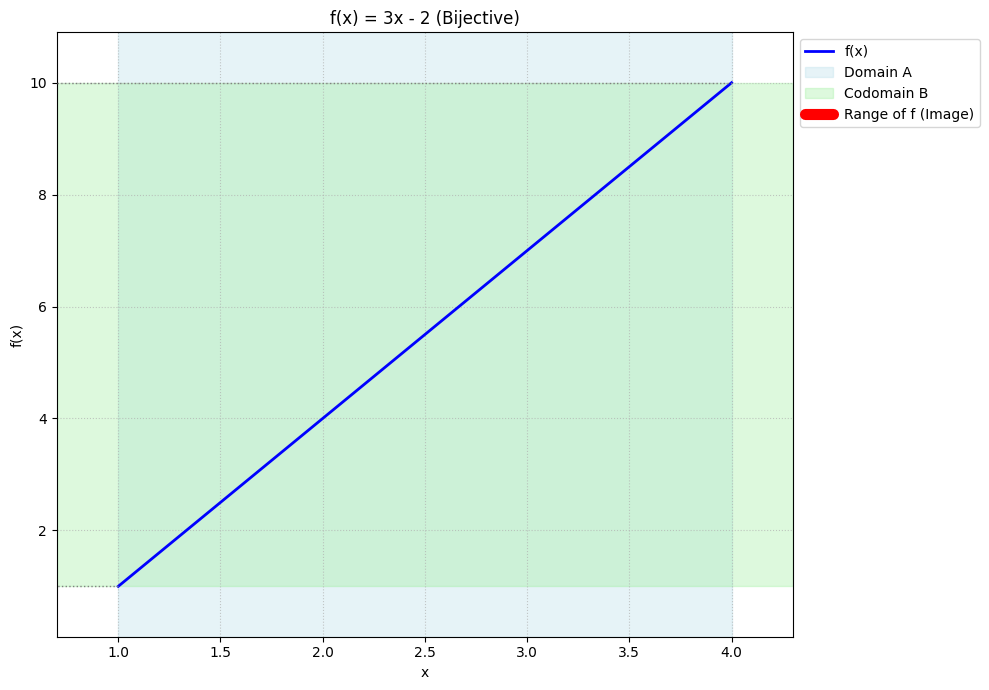

In [ ]:
# Example 3: Bijective (Continuous)

# Assuming characterize_continuous_function and plot_continuous_function are defined in a previous cell

def f3_continuous(x):
    return 3 * x - 2

domain_A3_cont = (1, 4) # Domain: [1, 4]
codomain_B3_cont = (1, 10) # Codomain: [1, 10]. Range of 3x-2 on [1,4] is [1, 10].

is_inj3_c, is_sur3_c, is_bij3_c, summary3_c, actual_range3_c, x_vals3_c, y_vals3_c = \
    characterize_continuous_function(f3_continuous, domain_A3_cont, codomain_B3_cont)

print("\n--- Example 3: Bijective (Continuous) ---")
print(summary3_c)
plot_continuous_function(f3_continuous, domain_A3_cont, codomain_B3_cont, actual_range3_c, x_vals3_c, y_vals3_c,
                         "f(x) = 3x - 2 (Bijective)")


--- Example 4: Neither Injective nor Surjective (Continuous) ---
Function Characteristics (Continuous):
  Domain A: (0, 6.283185307179586)
  Codomain B: (-2, 2)
  Approximated Range of f (over Domain A): (np.float64(-0.9999950553174459), np.float64(1.0))
  - Is Injective (One-to-One): No (Function appears non-monotonic over the domain or has plateaus)
  - Is Surjective (Onto): No (The function's range does not precisely match the codomain B)
    (Reason: Calculated range min/max does not match codomain min/max.)
  - Is Bijective: No



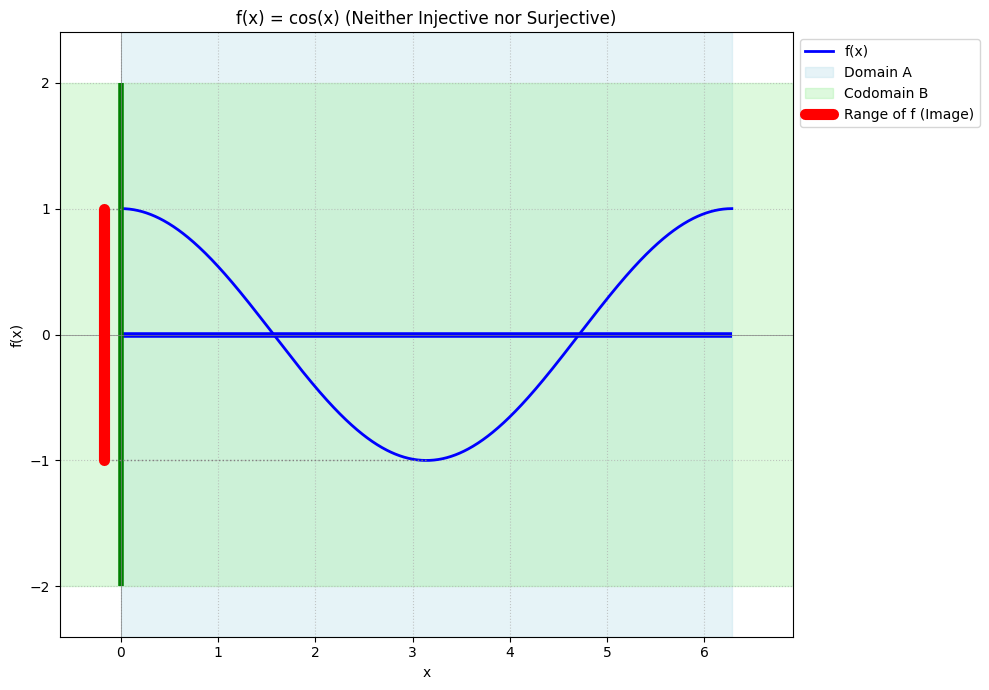

In [ ]:
# Example 4: Neither Injective nor Surjective (Continuous)

# Assuming characterize_continuous_function and plot_continuous_function are defined in a previous cell

def f4_continuous(x):
    return np.cos(x) # Cosine wave is generally neither on a wide domain

domain_A4_cont = (0, 2 * np.pi) # Domain: [0, 2pi]
codomain_B4_cont = (-2, 2) # Codomain: [-2, 2]. Range of cos(x) is [-1, 1].

is_inj4_c, is_sur4_c, is_bij4_c, summary4_c, actual_range4_c, x_vals4_c, y_vals4_c = \
    characterize_continuous_function(f4_continuous, domain_A4_cont, codomain_B4_cont)

print("\n--- Example 4: Neither Injective nor Surjective (Continuous) ---")
print(summary4_c)
plot_continuous_function(f4_continuous, domain_A4_cont, codomain_B4_cont, actual_range4_c, x_vals4_c, y_vals4_c,
                         "f(x) = cos(x) (Neither Injective nor Surjective)")